In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [406]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

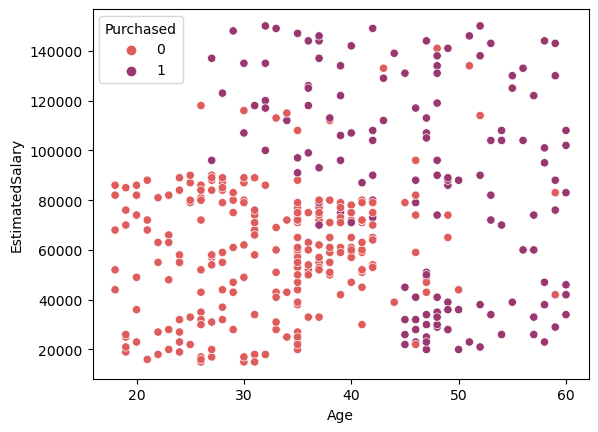

In [415]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],hue=df["Purchased"],palette = "flare")

In [419]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [420]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#df['Gender'] = le.fit_transform(df['Gender'])
#df = pd.get_dummies(df, columns=['Gender'])

In [421]:
drop_id_df=df.drop(["User ID"],axis=1)
drop_id_df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [37]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [10]:
def outlier_presence(drop_id_df):
  for i in drop_id_df.keys():
    Q1 = drop_id_df[i].quantile(0.25)
    Q3= drop_id_df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower_thershold ", lower_limit)
    print("Upper_thershold ", upper_limit)
    outliers = drop_id_df[(drop_id_df[i]<lower_limit)|(drop_id_df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(drop_id_df)

Interquartile Range of Gender is 1.0
Lower_thershold  -1.5
Upper_thershold  2.5
Outlier is Not Presented In Gender


Interquartile Range of Age is 16.25
Lower_thershold  5.375
Upper_thershold  70.375
Outlier is Not Presented In Age


Interquartile Range of EstimatedSalary is 45000.0
Lower_thershold  -24500.0
Upper_thershold  155500.0
Outlier is Not Presented In EstimatedSalary


Interquartile Range of Purchased is 1.0
Lower_thershold  -1.5
Upper_thershold  2.5
Outlier is Not Presented In Purchased




In [11]:
def Outlier_Data_Points(drop_id_df):
  for i in drop_id_df.keys():
    Q1 = drop_id_df[i].quantile(0.25)
    Q3 = drop_id_df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = drop_id_df[(drop_id_df[i]<lower_limit)|(drop_id_df[i]>upper_limit)]
    if outliers.empty: 
      print("No Outlier is Presented In",i )
    else:
      print("Outlier is Presented In " + i + " is")
      for j in outliers[i]:
        print(j)
      print("\n")
Outlier_Data_Points(drop_id_df)

No Outlier is Presented In Gender
No Outlier is Presented In Age
No Outlier is Presented In EstimatedSalary
No Outlier is Presented In Purchased


In [390]:
from sklearn.model_selection import train_test_split        

X = drop_id_df.loc[:,["Age","EstimatedSalary"]].values
y = drop_id_df.loc[:,"Purchased"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 73)

In [391]:
X_train

array([[    45,  22000],
       [    37, 144000],
       [    30,  80000],
       [    42,  80000],
       [    43, 112000],
       [    48,  74000],
       [    31,  18000],
       [    50,  88000],
       [    58, 144000],
       [    48,  29000],
       [    35,  50000],
       [    57,  60000],
       [    41,  30000],
       [    30,  62000],
       [    46,  88000],
       [    28,  79000],
       [    47,  34000],
       [    34, 115000],
       [    54,  26000],
       [    24,  84000],
       [    25,  22000],
       [    31,  58000],
       [    59, 143000],
       [    43, 133000],
       [    46,  28000],
       [    60, 102000],
       [    41,  72000],
       [    37,  77000],
       [    26,  17000],
       [    40,  59000],
       [    49,  28000],
       [    47,  49000],
       [    42,  80000],
       [    41,  72000],
       [    39,  42000],
       [    26,  30000],
       [    37,  93000],
       [    26,  43000],
       [    23,  48000],
       [    37,  75000],


In [392]:
X_test

array([[    49,  39000],
       [    32, 150000],
       [    40,  71000],
       [    40,  57000],
       [    36,  54000],
       [    48, 131000],
       [    35,  20000],
       [    49,  89000],
       [    58,  23000],
       [    40,  61000],
       [    32, 120000],
       [    47, 105000],
       [    45,  26000],
       [    42, 104000],
       [    22,  27000],
       [    41,  79000],
       [    21,  72000],
       [    47, 113000],
       [    31,  15000],
       [    52,  90000],
       [    47,  43000],
       [    32, 135000],
       [    58,  95000],
       [    27,  57000],
       [    35,  72000],
       [    49,  88000],
       [    24,  89000],
       [    39,  96000],
       [    31,  76000],
       [    31, 118000],
       [    35,  71000],
       [    40,  75000],
       [    36, 126000],
       [    35,  88000],
       [    48,  33000],
       [    48,  41000],
       [    39,  79000],
       [    20,  86000],
       [    46,  79000],
       [    28,  59000],


<AxesSubplot:>

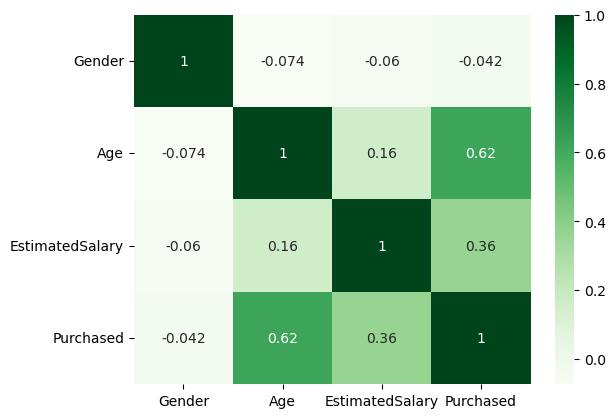

In [393]:
corr = drop_id_df.corr()
sns.heatmap(corr, cmap="Greens", annot=True)

**Feature Scaling**

In [394]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [395]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [396]:
X_train,X_test

(array([[ 0.71700345, -1.35544458],
        [-0.05293314,  2.21200952],
        [-0.72662765,  0.34055819],
        [ 0.42827723,  0.34055819],
        [ 0.5245193 ,  1.27628386],
        [ 1.00572967,  0.16510963],
        [-0.63038558, -1.47241028],
        [ 1.19821381,  0.57448961],
        [ 1.9681504 ,  2.21200952],
        [ 1.00572967, -1.15075459],
        [-0.24541729, -0.53668462],
        [ 1.87190833, -0.24427035],
        [ 0.33203515, -1.12151316],
        [-0.72662765, -0.1857875 ],
        [ 0.81324552,  0.57448961],
        [-0.9191118 ,  0.31131676],
        [ 0.90948759, -1.00454745],
        [-0.34165936,  1.36400814],
        [ 1.58318211, -1.23847887],
        [-1.30408009,  0.4575239 ],
        [-1.20783802, -1.35544458],
        [-0.63038558, -0.3027532 ],
        [ 2.06439247,  2.18276809],
        [ 0.5245193 ,  1.89035382],
        [ 0.81324552, -1.17999601],
        [ 2.16063455,  0.98386959],
        [ 0.33203515,  0.10662677],
        [-0.05293314,  0.252

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

In [397]:
from sklearn.linear_model import LogisticRegression        #main code that build the LR model 
logistic_regression= LogisticRegression()                  #initialise the required package


**Fitting Logistic Regression to the Training set**

In [398]:
logistic_regression.fit(X_train,y_train) #magic happens - best values of betas - training/learning happens here

LogisticRegression()

**Step 3 | Predection**

In [399]:
y_pred=logistic_regression.predict(X_test)

#logistic_regression.coef_
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [400]:
logistic_regression.intercept_

array([-1.16783155])

In [401]:
logistic_regression.coef_

array([[2.07440474, 0.99974962]])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

<AxesSubplot:>

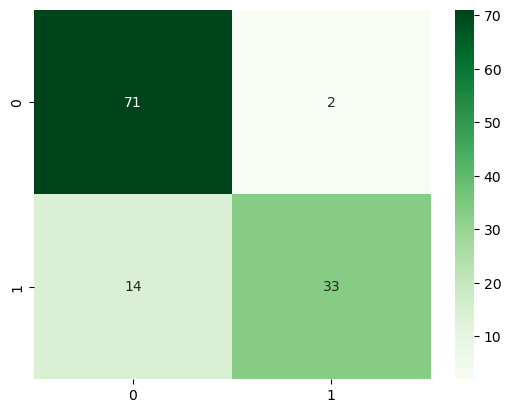

In [402]:
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,cmap="Greens",annot=True)

In [403]:
f1_score(y_test,y_pred) # f1 score

0.8048780487804879

## here changed random state as many values for confusion matrix it gave 0.80 and acc 0.867 and AUROC 0.95

**Visualization**

C:\Users\seeyo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


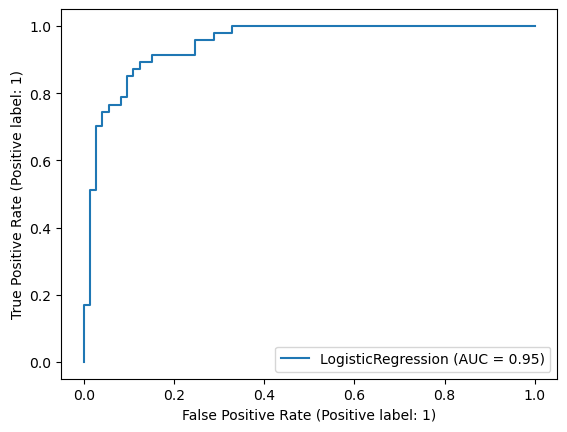

In [404]:
plot_roc_curve(logistic_regression, X_test, y_test) #AUROC

In [405]:
accuracy_score(y_test,y_pred) #accuracy

0.8666666666666667